In [1]:
import numpy as np
import pandas as pd

In [2]:
inputData = pd.read_csv('./Corona_train.csv').to_numpy()

In [3]:
inputData[0]

array([22979, 'Positive',
       'I see all kinds of academics already whipping up some #Covid_19 related projects, cfp, syllabi, articles, and blog posts.\r\r\n\r\r\nIÂ\x92m sittin over here browsing all the food left &amp; tryin to figure out when to go back out to the grocery store. Apparently I donÂ\x92t do well in pandemic'],
      dtype=object)

In [18]:
# Features for Naive-Bayes
allWords = []
dictWord = {}
for data in inputData:
    text = data[2].split()
    for word in text:
        if (word != ' ') and (word not in dictWord):
            dictWord[word] = len(allWords)
            allWords.append(word)

In [19]:
len(dictWord)

128329

In [6]:
maxValue = 0
i = 0
for data in inputData:
    text = data[2].split(' ')
    dictValues = {}
    for word in text:
        if(word not in dictValues): dictValues[word] = 1
        else: dictValues[word] += 1
    i += 1
    maxValue = max(maxValue, max(dictValues[word] for word in dictValues))

In [7]:
maxValue

101

In [8]:
pc = [0, 0, 0]
pc[0] = inputData[inputData[:, 1] == 'Positive'].shape[0] / inputData.shape[0]
pc[1] = inputData[inputData[:, 1] == 'Neutral'].shape[0] / inputData.shape[0]
pc[2] = inputData[inputData[:, 1] == 'Negative'].shape[0] / inputData.shape[0]

In [9]:
pc

[0.4384639763363617, 0.1874075639129516, 0.37412845975068665]

In [20]:
def parameters():
    p_wc = np.zeros((3, len(dictWord)))
    for data in inputData:
        text = data[2].split(' ')
        for word in text:
            if word not in dictWord: continue
            if(data[1] == 'Positive'): p_wc[0][dictWord[word]] += 1
            elif(data[1] == 'Neutral'): p_wc[1][dictWord[word]] += 1
            else: p_wc[2][dictWord[word]] += 1
    total = [0, 0, 0]
    total[0] = sum(p_wc[0])
    total[1] = sum(p_wc[1])
    total[2] = sum(p_wc[2])
    for i in range(len(total)):
        for j in range(len(p_wc[i])):
            p_wc[i][j] = (p_wc[i][j] + 1) / (total[i] + len(dictWord))
    return p_wc

In [21]:
p_wc = parameters()

In [22]:
def predict(text):
    text = text.split(' ')
    p = [0, 0, 0]
    for i in range(len(p)):
        p[i] = np.log(pc[i])
        for word in text:
            if(word in dictWord):
                p[i] += np.log(p_wc[i][dictWord[word]])
    return np.argmax(p)

In [23]:
correct = 0
incorrect = 0
for data in inputData:
    print(data[1], end=' ')
    print(predict(data[2]))
    if(data[1] == 'Positive' and predict(data[2]) == 0): correct += 1
    elif(data[1] == 'Neutral' and predict(data[2]) == 1): correct += 1
    elif(data[1] == 'Negative' and predict(data[2]) == 2): correct += 1
    else: incorrect += 1

Positive 0
Negative 2
Negative 0
Positive 0
Neutral 1
Neutral 2
Positive 0
Positive 0
Positive 0
Positive 0
Negative 2
Neutral 1
Positive 0
Negative 2
Negative 2
Neutral 1
Negative 2
Neutral 1
Neutral 1
Negative 2
Negative 0
Neutral 0
Negative 2
Negative 2
Negative 2
Neutral 1
Neutral 2
Positive 0
Positive 0
Neutral 0
Positive 0
Negative 2
Negative 2
Negative 2
Positive 0
Negative 2
Negative 2
Negative 2
Negative 0
Positive 0
Neutral 1
Negative 2
Negative 2
Positive 0
Positive 0
Positive 0
Positive 0
Positive 0
Negative 2
Negative 2
Neutral 0
Negative 2
Negative 2
Positive 0
Positive 0
Negative 2
Positive 0
Positive 0
Neutral 0
Negative 2
Negative 2
Negative 2
Positive 0
Positive 0
Negative 2
Positive 0
Positive 0
Positive 0
Negative 2
Negative 2
Positive 2
Negative 2
Neutral 1
Positive 0
Positive 0
Negative 2
Negative 2
Negative 0
Positive 0
Positive 0
Positive 0
Positive 0
Negative 2
Negative 2
Positive 0
Positive 0
Negative 2
Negative 2
Negative 2
Positive 0
Positive 0
Positive 0
Ne

In [24]:
print(f"Correct: {correct} \n Incorrecct: {incorrect} \n Accuracy: {correct / (correct + incorrect)}")

Correct: 31800 
 Incorrecct: 6064 
 Accuracy: 0.839847876611029


In [25]:
testData = pd.read_csv('./Corona_validation.csv').to_numpy()

In [26]:
valid_correct = 0
valid_incorrect = 0
for data in testData:
    print(data[1], end=' ')
    print(predict(data[2]))
    if(data[1] == 'Positive' and predict(data[2]) == 0): valid_correct += 1
    elif(data[1] == 'Neutral' and predict(data[2]) == 1): valid_correct += 1
    elif(data[1] == 'Negative' and predict(data[2]) == 2): valid_correct += 1
    else: valid_incorrect += 1

Negative 2
Negative 2
Negative 2
Neutral 2
Neutral 0
Negative 2
Negative 0
Neutral 1
Negative 2
Positive 0
Positive 0
Negative 2
Negative 2
Positive 0
Positive 0
Positive 0
Positive 0
Positive 0
Positive 0
Positive 0
Negative 2
Positive 0
Negative 2
Positive 0
Positive 0
Negative 2
Positive 2
Neutral 0
Neutral 0
Positive 0
Neutral 0
Negative 0
Negative 2
Neutral 0
Negative 2
Negative 0
Positive 0
Positive 2
Positive 2
Positive 2
Negative 2
Positive 2
Negative 2
Positive 0
Positive 2
Positive 0
Negative 2
Negative 2
Negative 2
Positive 0
Negative 2
Neutral 2
Positive 2
Positive 0
Neutral 1
Neutral 2
Positive 0
Negative 2
Negative 0
Neutral 0
Positive 0
Negative 2
Negative 2
Negative 2
Negative 2
Positive 0
Neutral 2
Positive 0
Positive 0
Positive 0
Positive 0
Negative 0
Positive 0
Positive 2
Neutral 2
Neutral 2
Neutral 2
Positive 0
Positive 0
Negative 2
Negative 2
Positive 0
Positive 0
Positive 0
Negative 2
Negative 2
Positive 0
Positive 0
Neutral 0
Positive 0
Negative 2
Positive 0
Posi

In [27]:
print(f"Correct: {valid_correct} \n Incorrect: {valid_incorrect} \n Accuracy: {valid_correct / (valid_correct + valid_incorrect)}")

Correct: 2188 
 Incorrect: 1105 
 Accuracy: 0.6644397206194959


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ''.join(inputData[:, 2])
text_positive = ''.join(inputData[inputData[:, 1] == 'Positive'][:, 2])
text_neutral = ''.join(inputData[inputData[:, 1] == 'Neutral'][:, 2])
text_negative = ''.join(inputData[inputData[:, 1] == 'Negative'][:, 2])
word_cloud = WordCloud(width = 800, height = 500, background_color ='white', min_font_size = 10).generate(text)
word_cloud_positive = WordCloud(width = 800, height = 500, background_color ='white', min_font_size = 10).generate(text_positive)
word_cloud_neutral = WordCloud(width = 800, height = 500, background_color ='white', min_font_size = 10).generate(text_neutral)
word_cloud_negative = WordCloud(width = 800, height = 500, background_color ='white', min_font_size = 10).generate(text_negative)

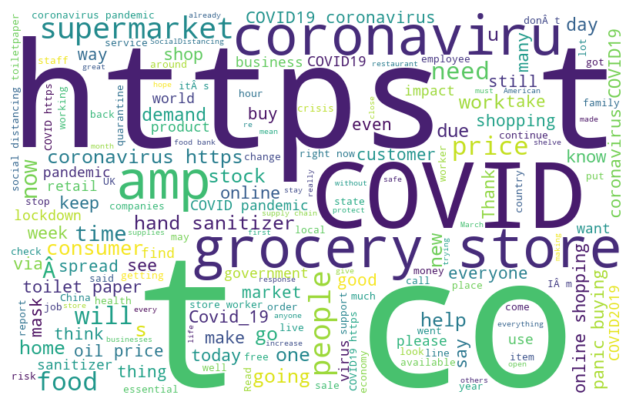

In [34]:
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_cloud.to_file("wordcloud_a_all.png")
word_cloud_positive.to_file("wordcloud_a_positive.png")
word_cloud_neutral.to_file("wordcloud_a_neutral.png")
word_cloud_negative.to_file("wordcloud_a_negative.png")

In [36]:
import random

def random_predict(text):
    return random.randint(0, 2)

def always_positive_predict(text):
    return 0

random_correct = 0
random_incorrect = 0
for data in testData:
    # print(data[1], end=' ')
    # print(random_predict(data[2]))
    if(data[1] == 'Positive' and random_predict(data[2]) == 0): random_correct += 1
    elif(data[1] == 'Neutral' and random_predict(data[2]) == 1): random_correct += 1
    elif(data[1] == 'Negative' and random_predict(data[2]) == 2): random_correct += 1
    else: random_incorrect += 1

print("Random Prediction:")
print(f"Correct: {random_correct} \n Incorrect: {random_incorrect} \n Accuracy: {random_correct / (random_correct + random_incorrect)}")

always_positive_correct = 0
always_positive_incorrect = 0
for data in testData:
    # print(data[1], end=' ')
    # print(always_positive_predict(data[2]))
    if(data[1] == 'Positive' and always_positive_predict(data[2]) == 0): always_positive_correct += 1
    elif(data[1] == 'Neutral' and always_positive_predict(data[2]) == 1): always_positive_correct += 1
    elif(data[1] == 'Negative' and always_positive_predict(data[2]) == 2): always_positive_correct += 1
    else: always_positive_incorrect += 1

print("Always Positive Prediction:")
print(f"Correct: {always_positive_correct} \n Incorrect: {always_positive_incorrect} \n Accuracy: {always_positive_correct / (always_positive_correct + always_positive_incorrect)}")

Random Prediction:
Correct: 1089 
 Incorrect: 2204 
 Accuracy: 0.33070148800485877
Always Positive Prediction:
Correct: 1444 
 Incorrect: 1849 
 Accuracy: 0.4385059216519891


In [37]:
# Confusion Matrix

print("Confusion Matrix for Naive Bayes Model:")
confusion_matrix_model_train = np.zeros((3, 3))
for data in inputData:
    prediction = predict(data[2])
    if(data[1] == 'Positive'): confusion_matrix_model_train[0][prediction] += 1
    elif(data[1] == 'Neutral'): confusion_matrix_model_train[1][prediction] += 1
    else: confusion_matrix_model_train[2][prediction] += 1

print("1. Training Data")
print(confusion_matrix_model_train)

confusion_matrix_model_valid = np.zeros((3, 3))
for data in testData:
    prediction = predict(data[2])
    if(data[1] == 'Positive'): confusion_matrix_model_valid[0][prediction] += 1
    elif(data[1] == 'Neutral'): confusion_matrix_model_valid[1][prediction] += 1
    else: confusion_matrix_model_valid[2][prediction] += 1

print("2. Validation Data")
print(confusion_matrix_model_valid)

print("Confusion Matrix for Random Prediction Model:")
confusion_matrix_random_train = np.zeros((3, 3))
for data in inputData:
    prediction = random_predict(data[2])
    if(data[1] == 'Positive'): confusion_matrix_random_train[0][prediction] += 1
    elif(data[1] == 'Neutral'): confusion_matrix_random_train[1][prediction] += 1
    else: confusion_matrix_random_train[2][prediction] += 1

print("1. Training Data")
print(confusion_matrix_random_train)

confusion_matrix_random_valid = np.zeros((3, 3))
for data in testData:
    prediction = random_predict(data[2])
    if(data[1] == 'Positive'): confusion_matrix_random_valid[0][prediction] += 1
    elif(data[1] == 'Neutral'): confusion_matrix_random_valid[1][prediction] += 1
    else: confusion_matrix_random_valid[2][prediction] += 1

print("2. Validation Data")
print(confusion_matrix_random_valid)

print("Confusion Matrix for Always Positive Prediction Model:")
confusion_matrix_always_positive_train = np.zeros((3, 3))
for data in inputData:
    prediction = always_positive_predict(data[2])
    if(data[1] == 'Positive'): confusion_matrix_always_positive_train[0][prediction] += 1
    elif(data[1] == 'Neutral'): confusion_matrix_always_positive_train[1][prediction] += 1
    else: confusion_matrix_always_positive_train[2][prediction] += 1

print("1. Training Data")
print(confusion_matrix_always_positive_train)

confusion_matrix_always_positive_valid = np.zeros((3, 3))
for data in testData:
    prediction = always_positive_predict(data[2])
    if(data[1] == 'Positive'): confusion_matrix_always_positive_valid[0][prediction] += 1
    elif(data[1] == 'Neutral'): confusion_matrix_always_positive_valid[1][prediction] += 1
    else: confusion_matrix_always_positive_valid[2][prediction] += 1

print("2. Validation Data")
print(confusion_matrix_always_positive_valid)


Confusion Matrix for Naive Bayes Model:
1. Training Data
[[15709.   164.   729.]
 [ 2357.  3312.  1427.]
 [ 1225.   162. 12779.]]
2. Validation Data
[[1194.   22.  228.]
 [ 349.   91.  177.]
 [ 310.   19.  903.]]
Confusion Matrix for Random Prediction Model:
1. Training Data
[[5559. 5424. 5619.]
 [2318. 2360. 2418.]
 [4797. 4667. 4702.]]
2. Validation Data
[[471. 497. 476.]
 [213. 186. 218.]
 [390. 417. 425.]]
Confusion Matrix for Always Positive Prediction Model:
1. Training Data
[[16602.     0.     0.]
 [ 7096.     0.     0.]
 [14166.     0.     0.]]
2. Validation Data
[[1444.    0.    0.]
 [ 617.    0.    0.]
 [1232.    0.    0.]]
